In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.misc import derivative
import warnings
import autograd.numpy as np
from autograd import grad
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")

1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|


In [86]:
X = [0,1,2,3,4,5]
Y = [0,1,2,3,4,5]
df = pd.DataFrame({
    "Y":  Y,
    "X_1":  X
    })
df.index.name = "Entrenamiento"
df

,Y,X_1
Entrenamiento,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


2. Crear una función para calcular la función de coste.

In [104]:
def coste(df, theta0, theta1, m):
  def h(x):
    h = theta0 + theta1*x
    return(h)
  l = []
  for i in range(0,m):
    t = (h(df.loc[i,"X_1"])-df.loc[i,"Y"])**2
    l.append(t)
  suma = (1/(2*m))*sum(l)
  return(suma)

3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.


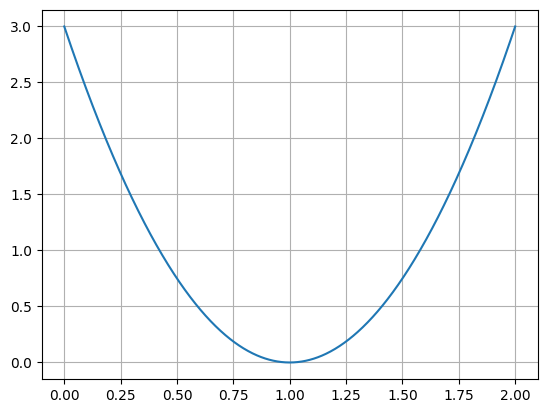

In [88]:
theta = np.linspace(0,2,1000)
l = []
for i in range(0,len(theta)):
  l.append(coste(df,0,theta[i],5))
plt.plot(theta,l,label="Coste")
plt.grid()
plt.show() #Vemos que el valor minimo ocurre en theta=1

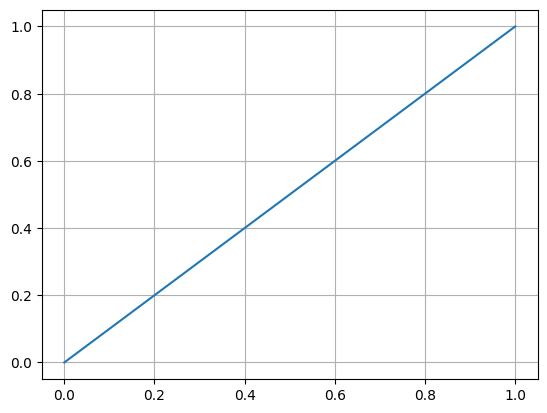

In [123]:
def h(x): #theta0 = 0 y theta1= 1
  h = x
  return(h)
y = []
for i in range(0,len(df["X_1"])):
  y.append(h(df.loc[i,"X_1"]))
plt.plot(df["X_1"],y)
plt.grid()
plt.show()

4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

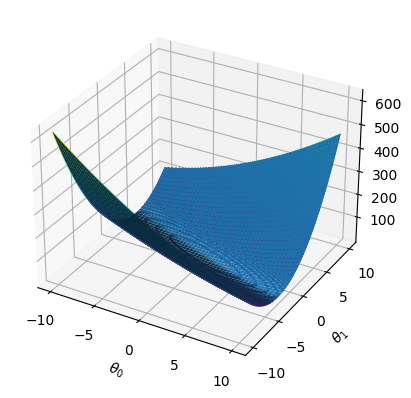

In [90]:
theta0 = np.linspace(-10,10,1000)
theta1 = np.linspace(-10,10,1000)
theta0, theta1 = np.meshgrid(theta0, theta1)
k = coste(df,theta0,theta1,5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0, theta1, k)
ax.contour(theta0, theta1, k, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

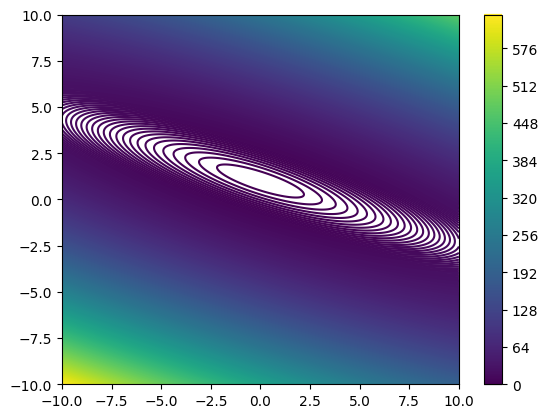

In [91]:
plt.contour(theta0, theta1, k, 1000, linestyles="solid")
plt.colorbar()
plt.show()

6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

In [92]:
f = lambda x: (x-4)**2
def grad_descende(f,alpha):
  w = 3
  while abs(derivative(f,w)) >= 1e-4:
    w = w - alpha*derivative(f,w)
  return(w)
grad_descende(f,0.1)

3.999956443857034

In [93]:
grad_descende(f,0.9)

4.000043556142965

In [94]:
grad_descende(f,0.5)

4.0

7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.

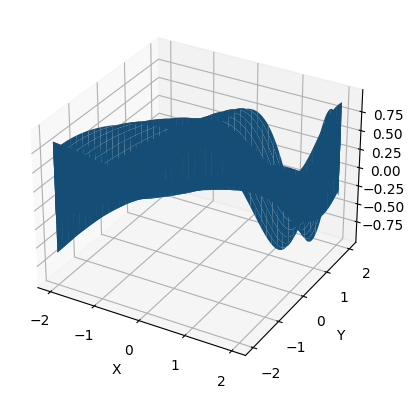

In [95]:
func = lambda th: np.sin((th[0]**2)/2 - (th[1]**2)/4 + 3)*np.cos(2*th[0] + 1 - np.e**th[1])
X = np.linspace(-2,2,1000)
Y = np.linspace(-2,2,1000)
Z = np.zeros((1000,1000))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[ix,iy] = func([x,y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

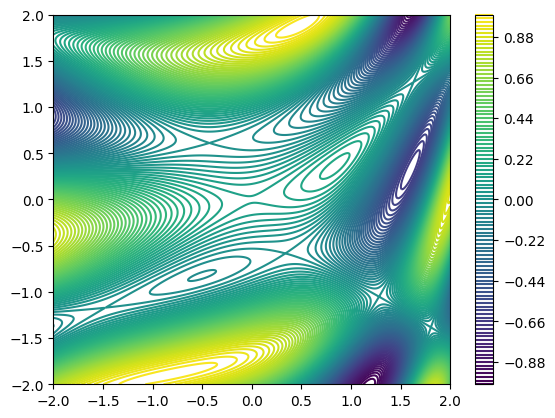

In [96]:
plt.contour(X,Y,Z,100)
plt.colorbar()
plt.show()

In [168]:
theta = np.random.rand(2)*4 - 2
gradf = grad(func)
delta = 0.0001
for i in range(1000):
  theta = theta - delta*gradf(theta)
func(theta) #Minimo de la funcion

-0.099153591102751

8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.

In [114]:
X = np.linspace(0,1,100)
Y = 0.2 + 0.2*X + 0.2*np.random.random(100)
df = pd.DataFrame({
    "Y":  Y,
    "X_1":  X
    })
df.index.name = "Entrenamiento"
df

,Y,X_1
Entrenamiento,,
0,0.323732,0.000000
1,0.325169,0.010101
2,0.257964,0.020202
3,0.353648,0.030303
4,0.254117,0.040404
...,...,...
95,0.481852,0.959596
96,0.585949,0.969697
97,0.441527,0.979798


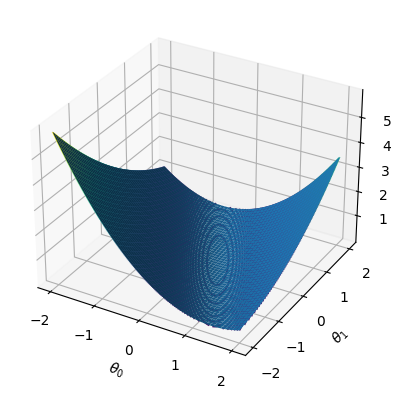

In [131]:
theta0 = np.linspace(-2,2,1000)
theta1 = np.linspace(-2,2,1000)
theta0, theta1 = np.meshgrid(theta0, theta1)
J = coste(df,theta0,theta1,100)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0, theta1, J)
ax.contour(theta0, theta1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

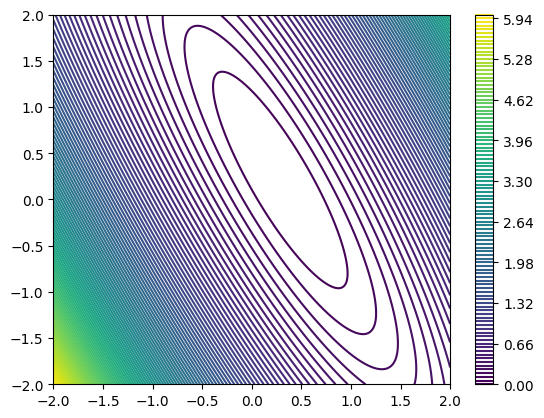

In [132]:
plt.contour(theta0, theta1, J, 100, linestyles="solid")
plt.colorbar()
plt.show()

In [148]:
coste1 = lambda th: coste(df,th[0],th[1],100)

In [183]:
grad_coste = grad(coste1)
theta = np.random.rand(2)*4 - 2
delta = 0.5
for i in range(100):
  theta = theta - delta*grad_coste(theta)

min = coste1(theta)
min

0.0016867529853974359

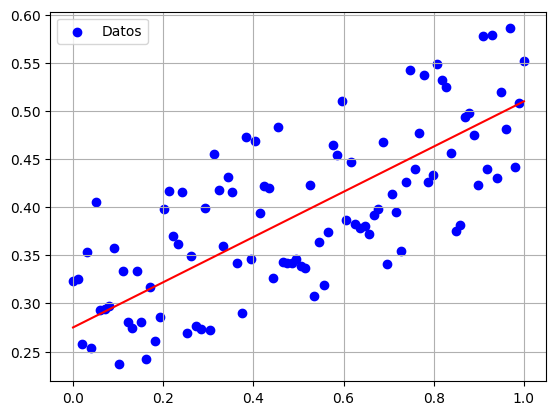

In [200]:
def h(x):
  h = theta[0] + theta[1]*x
  return(h)
y = []
for i in range(0,len(df["X_1"])):
  y.append(h(df.loc[i,"X_1"]))
plt.plot(df["X_1"],y, color= "red")
plt.scatter(df["X_1"], df["Y"], color= "blue", label = "Datos")
plt.legend()
plt.grid()
plt.show()

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

Coeficiente: 0.21114155371466184
Intersección: 0.2879007762722357


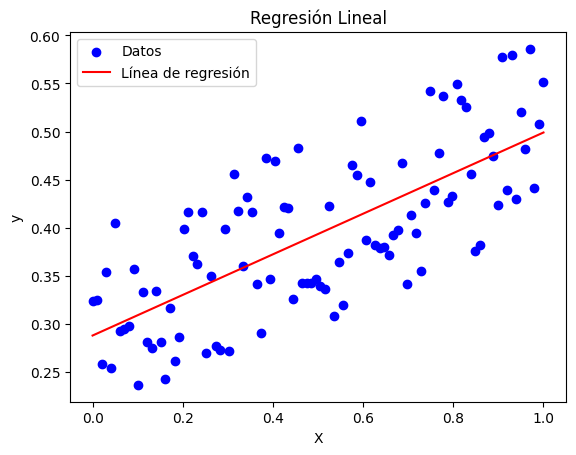

In [195]:
X = X.reshape(-1, 1)
y = Y

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

print("Coeficiente:", model.coef_[0])
print("Intersección:", model.intercept_)

plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, y_pred, color='red', label='Línea de regresión')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión Lineal")
plt.legend()
plt.show()
